In [ ]:
#!unzip "drive/My Drive/ Dog vision/dog-breed-identification.zip" -d "drive/My Drive/ Dog vision/"

In [ ]:
#

# End-to-end Multi-class Dog Breed Classification 

This notebook bulids an end-to-end multi-class image classifier using transfer learning in TensorFlow 2.0 and TensorFlow Hub.

## 1. problem

 Identifying the breed of a dog given an image of a dog.

 When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we are using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:

* We're dealing with images (unstructed data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set(these images have no labels, because we'll want to predict them).

### Get our workspace ready

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU

In [ ]:
# Import TensorFlow into Colab 
import tensorflow as tf
print("TF version:", tf.__version__)


TF version: 2.2.0


### Get our workspace ready

In [ ]:
 # Import necessary tools
 import tensorflow as tf
 import tensorflow_hub as hub
 print("TF version:", tf.__version__)
 print("TF Hub version:", hub.__version__)

 # Check for GPU availablity
 print("GPU", "available (YESSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.2.0
TF Hub version: 0.8.0
GPU available (YESSS!!!!!!)


## Getting our data ready (turning into Tensors)

WIth all Machine Learning models, our data has to be in numeric format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [ ]:
# Checkout the labels of our data 
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/ Dog vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     b57f4d8d01aec87fb4e257b1e265ec38  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

In [ ]:
# How many images are there of each breed?
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
komondor                 67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

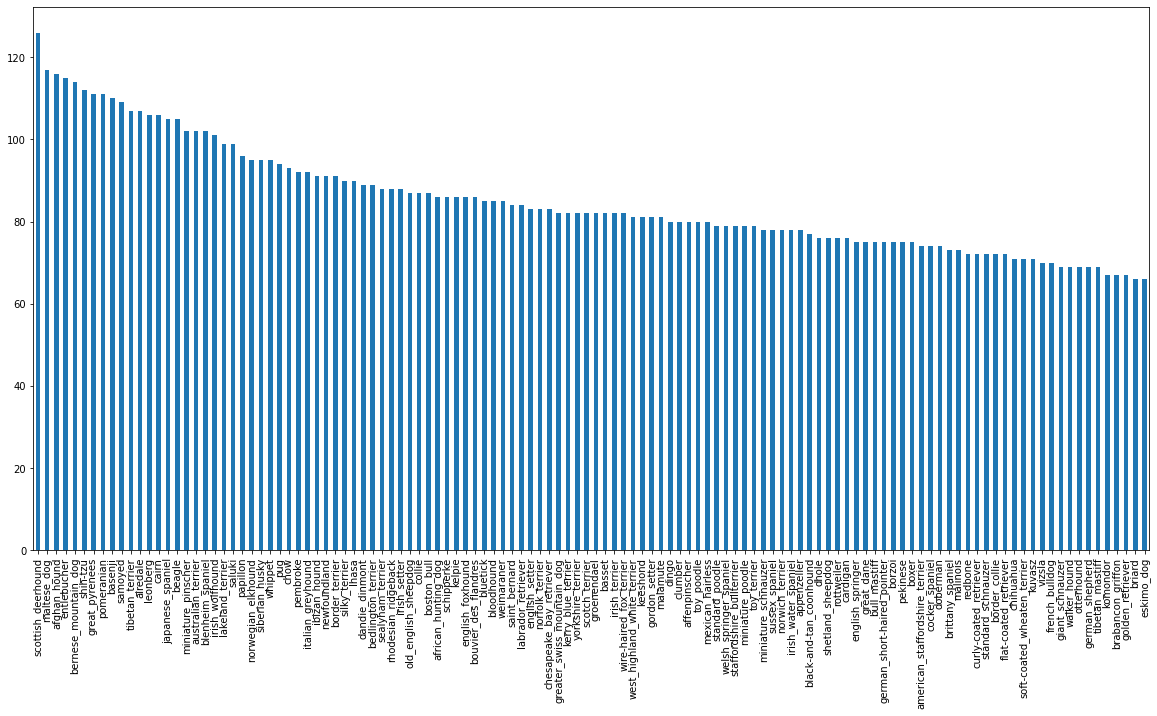

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

In [ ]:
# # Let's view an image
# from Ipython.display import Image
# Image("drive/My Drive/ Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

ModuleNotFoundError: ignored

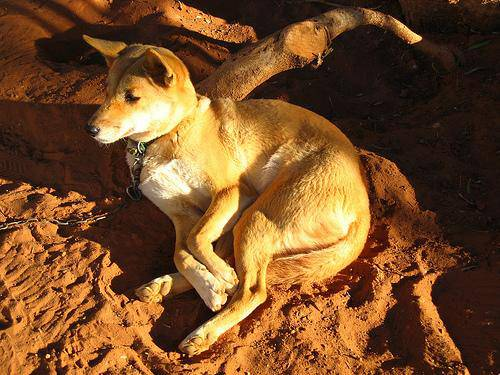

In [ ]:
# Let's view an image, # Use capital 'P' for IPython
from IPython.display import Image
Image("drive/My Drive/ Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Let's get a list of all of our image file pathnames.

In [ ]:
# Create pathnames from image ID's
filenames = ["drive/My Drive/ Dog vision/train/"+fname+".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['drive/My Drive/ Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/ Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/ Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/ Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/ Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/ Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/ Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/ Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/ Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/ Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of files matches number of actual image files

import os
if len(os.listdir("drive/My Drive/ Dog vision/train/")) == len(filenames):
  print("Filenames match actual amount of files !!! proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory.")  


Filenames match actual amount of files !!! proceed.


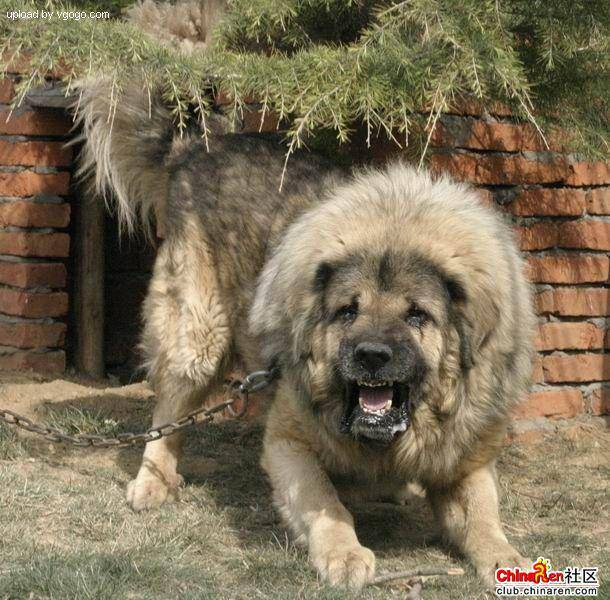

In [ ]:
# One more check
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got our training image filepath in a list, let's prepare our lables.

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels) # does same as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of lables matches number of filenames!")
else:
  print("Numer of lables does not match number of files, check data directories!")  

Number of lables matches number of filenames!


In [ ]:
# Find the nunique lables
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
len(labels)

10222

In [ ]:
# Turn every label into boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:

print(labels[0]) # original label
labels[0]

boston_bull


'boston_bull'

In [ ]:
# Example: Turning boolean array into integers

print(labels[0]) # original label
print(np.where(labels[0] == unique_breeds)) # index where lable occure
print(boolean_labels[0].argmax()) # index where label occure in boolean array
print(boolean_labels[0].astype(int)) # there will be 1 where the sample label occures

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
# Image path
filenames[:10]

['drive/My Drive/ Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/ Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/ Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/ Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/ Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/ Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/ Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/ Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/ Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/ Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']


## Creating our own validation set

Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [ ]:
# Setuo x & y variables
x = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

We're going to start off experimenting with ~1000 images and increase as needed.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:10000, step:1000}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and vlidation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a geez at the training data
x_train[:5], y_train[:2]

(['drive/My Drive/ Dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/ Dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/ Dog vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/ Dog vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/ Dog vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, Fals

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` ( a jpg) into Tensors
4. Resize the `image` to be shape of (224, 224)
5. Return the modified image

Before we do, let's see what importing an image looks like

In [ ]:
# Convert image to Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

# 3 is the colour channel, means every image is combination of red, green and blue pixels

(257, 350, 3)

In [ ]:
image.min(), image.max()

(0, 255)

In [ ]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [ ]:
# convert image into a Tensor by tf that runs on GPU where as a Numpy array runs on CPU (local machine)
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor let's make a function to preprocess them.

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` ( a jpg) into Tensors
4. Normalize our image ( convert colour channel values from 0-255 to 0-1).
5. Resize the `image` to be shape of (224, 224)
6. Return the modified image

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """"
  Takes an image file path and turns the image into a Tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (red, Green and Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 value
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


In [ ]:
# Example, tf read file from filenames and convert into Tensor
tensor = tf.io.read_file(filenames[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [ ]:
# eg, convert image into numeric Tensor
tensor = tf.image.decode_jpeg(tensor, channels=3)

In [ ]:
tensor[:2]

<tf.Tensor: shape=(2, 375, 3), dtype=uint8, numpy=
array([[[ 59,  68,  65],
        [ 64,  73,  70],
        [ 71,  80,  77],
        ...,
        [115, 128, 108],
        [115, 128, 108],
        [110, 123, 103]],

       [[ 65,  74,  71],
        [ 72,  81,  78],
        [ 79,  88,  85],
        ...,
        [114, 127, 107],
        [117, 130, 110],
        [116, 129, 109]]], dtype=uint8)>

In [ ]:
# eg, normalizing  from 0-255 to 0-1
 tf.image.convert_image_dtype(tensor, tf.float32)

<tf.Tensor: shape=(500, 375, 3), dtype=float32, numpy=
array([[[0.23137257, 0.26666668, 0.25490198],
        [0.2509804 , 0.28627452, 0.27450982],
        [0.2784314 , 0.3137255 , 0.3019608 ],
        ...,
        [0.45098042, 0.5019608 , 0.42352945],
        [0.45098042, 0.5019608 , 0.42352945],
        [0.43137258, 0.48235297, 0.4039216 ]],

       [[0.25490198, 0.2901961 , 0.2784314 ],
        [0.28235295, 0.31764707, 0.30588236],
        [0.30980393, 0.34509805, 0.33333334],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.45882356, 0.50980395, 0.43137258],
        [0.454902  , 0.5058824 , 0.427451  ]],

       [[0.26666668, 0.3019608 , 0.2901961 ],
        [0.29803923, 0.33333334, 0.32156864],
        [0.3254902 , 0.36078432, 0.34901962],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.47058827, 0.52156866, 0.4431373 ],
        [0.48235297, 0.53333336, 0.454902  ]],

       ...,

       [[0.6784314 , 0.7843138 , 0.60784316],
        [0.64

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one g0...they all might not fit into memory.

So that's why we do about 32 (this is batch size) images at a time (you can manaually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this:
`(image, label)`

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processess the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo of the above
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: (image, label), let's make a function to turn all of our data (x & y) into batches!

In [ ]:
# Define the batch size, 32 is a good start 
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):

   """

   Creates batches of data out of image (x) and label (y) pairs.
   Shuffles the data if it's training data but doesn't shuffle if it's validation data.
   Also accepts test data as input (no labels).
   """

   # If the data is a test dataset, we probably don't have labels
   if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

   #If the data is a valid dataset, we don't need to shuffle it
   elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),  # filepaths
                                               tf.constant(y))) # lables
    data_batch = data.map(get_image_label).batch(BATCH_SIZE) 
    return data_batch

   else: 
      print("Creating training data batches...") 
      # Turn filepath and labels into Tensors
      data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                 tf.constant(y)))
      
      # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
      data = data.shuffle(buffer_size=len(x))

      # Create (image, label) tuples (this also turns the image path into a preprocessed image) 
      data = data.map(get_image_label)  

      # Turn the training data into batches
      data_batch = data.batch(BATCH_SIZE) 
      return data_batch                                    

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)


Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [ ]:
val_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

## Vusualizing Data Btches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visulaize them

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Display a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    #Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")


In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), train_labels

(32, array([[False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False,  True, False, ..., False, False, False]]))

In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
val_data

<function __main__.creat_data_batches>

In [ ]:
len(train_labels)

32

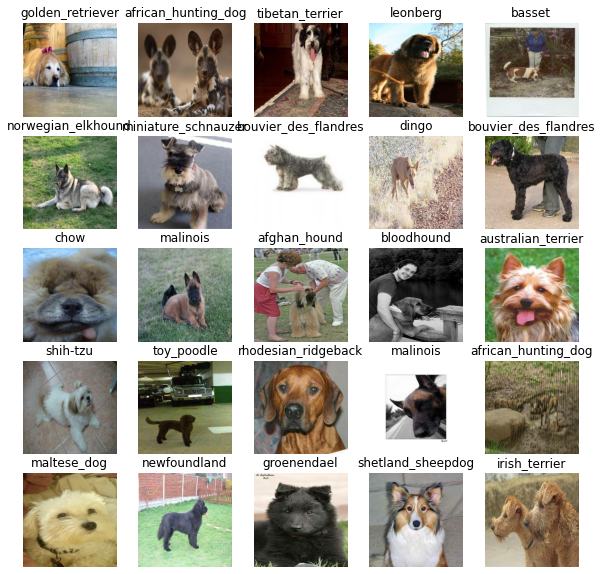

In [ ]:
# Now let's visualize the data into training batches
show_25_images(train_images, train_labels)

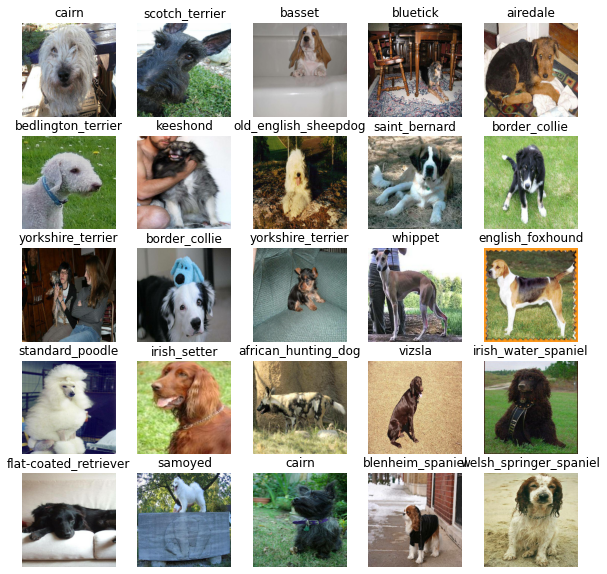

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are a few things we need to define:

* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image lables, in the form of Tensors) of our model.
* The URL of the model we want to use. https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4



In [ ]:
IMG_SIZE

224

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

 Now, we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

 Knowing this, let's create a function which:
 * Takes the input shape, output shape and the model we've chosen as parameters.
 * Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
 * Complies the model (says it should be evaluated and improvd).
 * Builds the model (tells the model the input shape it'll be getting).
 * Returns the model.

 All of these steps can be found here : https://www.tensorflow.org/guide/keras/overview



In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Complie the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_3 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback

1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our model training logs with the `%tensorboard` magic function (we'll do this after model training).

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime

# create a function to build a TensorBoard callback
def create_tensorboard_callback():
  #Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/ Dog vision/logs", 
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stop improving.

In [ ]:
# Create early stopping callabck
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)

Our first model is only going to train 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param{type:"slider", min:10, max:100, step:10}

In [ ]:
# Check to make sure we're still runnung on a GPU
print("GPU", "available (YESSSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU available (YESSSS!!!!)


Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHES) and the callbacks we'd like to use.
* Return the model



In [ ]:
# Build a function to train and retuen a trained model
def train_model():
  """
  Train a given model and return the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  #Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  
  # Return the fitted model
  return model




In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 420s 17s/step - loss: 4.5244 - accuracy: 0.1013 - val_loss: 3.5180 - val_accuracy: 0.2650
Epoch 2/100
25/25 [==============================] - 5s 184ms/step - loss: 1.5966 - accuracy: 0.6925 - val_loss: 2.2807 - val_accuracy: 0.4550
Epoch 3/100
25/25 [==============================] - 5s 188ms/step - loss: 0.5732 - accuracy: 0.9388 - val_loss: 1.7153 - val_accuracy: 0.5900
Epoch 4/100
25/25 [==============================] - 5s 186ms/step - loss: 0.2507 - accuracy: 0.9875 - val_loss: 1.5438 - val_accuracy: 0.6000
Epoch 5/100
25/25 [==============================] - 5s 184ms/step - loss: 0.1475 - accuracy: 0.9962 - val_loss: 1.4418 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 5s 186ms/step - loss: 0.0986 - accuracy: 1.0000 - val_loss: 1.3944 - val_accuracy: 0.6600
Epoch 7/100
25/25 [==============================

**Question:** It looks like our model is overfittinh because it's performing far better on the training dataset than the validation dataset, what are some ways to prevent model overfitting in deep learning neural networks?

**NOTE:**Overfitting to begin with is a good thing! It means our model is learing!!

## Checking the TensorBoard logs

The TenorBoard magic function (%tensorboard) will access the logs directly we created earlier and visualize its contents.

In [ ]:
%tensorboard --logdir drive/My\ Drive/\ Dog\ vision/logs
# put \ if there is a space 

<IPython.core.display.Javascript object>

## MAking and evaluating predictions using a trained model

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Make predictions on the validation data ( not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 116ms/step


array([[4.20982204e-03, 7.22643235e-05, 5.05069038e-04, ...,
        1.96390029e-04, 8.25669413e-05, 1.49257630e-02],
       [3.68746789e-03, 1.21054240e-03, 5.47659257e-03, ...,
        2.23723846e-03, 4.23830329e-03, 1.54935813e-03],
       [3.50050395e-04, 1.37129566e-04, 3.55521013e-04, ...,
        3.14554200e-04, 4.31756285e-04, 1.14406263e-02],
       ...,
       [1.02361064e-05, 9.59387107e-05, 2.32168692e-04, ...,
        1.52029452e-05, 4.81950061e-04, 8.46245617e-04],
       [7.85208028e-03, 4.90221777e-04, 1.09507055e-04, ...,
        1.39945230e-04, 5.47913951e-04, 1.29101593e-02],
       [1.65448073e-04, 2.48611294e-04, 1.88650016e-03, ...,
        3.84547934e-03, 2.99766980e-04, 4.73257132e-05]], dtype=float32)

In [ ]:
 predictions[0]
# These are the  probabilities values that our model thinks about each image
# the highest value represnts the index of the label which model thinks 

array([4.20982204e-03, 7.22643235e-05, 5.05069038e-04, 5.26400399e-04,
       4.07137646e-04, 8.34702951e-05, 3.05388216e-02, 5.22840419e-04,
       7.11515429e-04, 1.44131819e-03, 5.65042836e-04, 1.44142599e-04,
       9.67875822e-04, 5.59610431e-04, 6.18248363e-04, 2.00989773e-03,
       5.23568669e-05, 3.33684653e-01, 9.40228638e-05, 2.29168523e-04,
       2.46549665e-04, 6.93238835e-05, 2.49115365e-05, 1.97232774e-04,
       1.83990487e-05, 8.35563522e-04, 2.31912047e-01, 5.93188197e-05,
       1.63318400e-04, 1.17329753e-03, 1.10805660e-04, 1.40837941e-03,
       1.45842484e-03, 5.59350774e-05, 1.65991951e-04, 5.85150234e-02,
       5.04613818e-05, 3.50696879e-04, 1.27555686e-04, 2.54348452e-05,
       1.24346116e-03, 2.78070511e-05, 3.94190429e-04, 1.09155735e-04,
       3.14045465e-05, 7.08371444e-05, 1.07763673e-03, 1.02770144e-04,
       1.30784127e-03, 1.16187592e-04, 2.77088286e-04, 2.77965621e-04,
       4.17841744e-04, 4.20373573e-04, 5.57140338e-05, 3.77386496e-05,
      

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
len(predictions[0])

120

In [ ]:
predictions.shape

(200, 120)

In [ ]:
len(y_val)

200

In [ ]:
len(unique_breeds)

120

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction) : {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[2.69445300e-04 2.92093755e-04 7.74213186e-05 9.69849061e-05
 4.69429139e-03 3.63656640e-04 2.59097171e-04 1.98283442e-03
 2.18975507e-02 3.96968760e-02 6.11283685e-05 1.06550851e-05
 1.70206811e-04 4.30483697e-03 6.48471108e-03 4.61248419e-04
 2.28542249e-05 1.76959927e-03 3.80953716e-05 5.66541275e-04
 1.66304584e-04 1.63222943e-03 2.52003101e-05 1.99143324e-05
 1.12559302e-02 2.21303180e-05 2.40532700e-05 8.73879035e-05
 6.14148012e-05 6.54856631e-05 1.86126766e-04 6.81516904e-05
 3.10674623e-05 1.39584954e-05 4.59685725e-05 6.63110113e-05
 3.63779254e-04 1.70189957e-03 7.09246815e-05 9.53140333e-02
 7.19852032e-05 2.76846986e-05 3.52068688e-03 2.15334112e-05
 1.85618192e-04 1.58211660e-05 2.49403729e-05 4.88286372e-04
 1.21174955e-04 1.67524224e-04 4.80396775e-05 1.07707630e-04
 7.88768157e-05 7.60894874e-03 6.42035593e-05 1.85396173e-04
 4.00263147e-04 7.30577449e-05 4.45657024e-05 3.20473482e-05
 2.27824479e-04 4.80128627e-04 2.66989209e-05 1.96810870e-05
 5.32490703e-05 7.550203

In [ ]:
unique_breeds[113]

'walker_hound'

Having the above fucntionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

**NOTE:** Predictions probabilities are also known as confidence levels.



In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)

def get_pred_label(prediction_probabilities):
  """

  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a prediction label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label


'cardigan'

Now since our validation data is still in a batch dataset. we'll have to unbatchify it to make prediction on the validation images and then compare those predictions to the validation labels (truth labels).

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batch dataset of (image, label) Tensor and returns seperate arrays of images and labels.
  """
  images = []
  labels = []
  #Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]    



(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
# Same as above
images_ = []
labels_ = []

# Loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)
  
images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
label

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
get_pred_label(labels_[0])

'cairn'

In [ ]:
get_pred_label(predictions[0])

'border_terrier'

Now we've got ways to get :
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visualize.

We'll create a function which:

* Takes an array of predictions, an array of truth labels and an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability the truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """

  View the prediction, ground truth and image for sample n
  """

  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending onif the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"  

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color) 

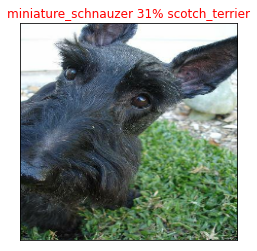

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

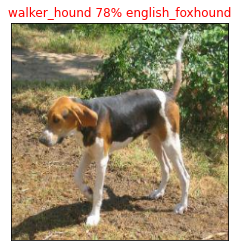

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=42)

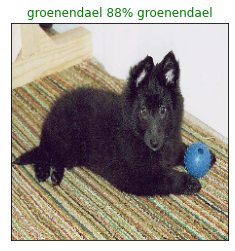

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one function to visualize our models top prediction. let's make another to view our model top 10 predictions

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green  


In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """

  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """

  pred_prob, true_label = prediction_probabilities[n], label[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # find the top 10 prediction confedence indexes 
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setuo plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change colour of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("red")
  else:
    pass  





/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


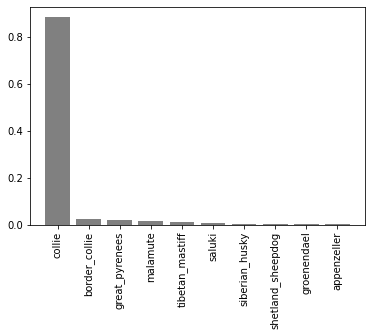

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9);

In [ ]:

predictions[0]

array([4.20982204e-03, 7.22643235e-05, 5.05069038e-04, 5.26400399e-04,
       4.07137646e-04, 8.34702951e-05, 3.05388216e-02, 5.22840419e-04,
       7.11515429e-04, 1.44131819e-03, 5.65042836e-04, 1.44142599e-04,
       9.67875822e-04, 5.59610431e-04, 6.18248363e-04, 2.00989773e-03,
       5.23568669e-05, 3.33684653e-01, 9.40228638e-05, 2.29168523e-04,
       2.46549665e-04, 6.93238835e-05, 2.49115365e-05, 1.97232774e-04,
       1.83990487e-05, 8.35563522e-04, 2.31912047e-01, 5.93188197e-05,
       1.63318400e-04, 1.17329753e-03, 1.10805660e-04, 1.40837941e-03,
       1.45842484e-03, 5.59350774e-05, 1.65991951e-04, 5.85150234e-02,
       5.04613818e-05, 3.50696879e-04, 1.27555686e-04, 2.54348452e-05,
       1.24346116e-03, 2.78070511e-05, 3.94190429e-04, 1.09155735e-04,
       3.14045465e-05, 7.08371444e-05, 1.07763673e-03, 1.02770144e-04,
       1.30784127e-03, 1.16187592e-04, 2.77088286e-04, 2.77965621e-04,
       4.17841744e-04, 4.20373573e-04, 5.57140338e-05, 3.77386496e-05,
      

In [ ]:
# Top 10 values of predictions indexes
predictions[0].argsort()[-10:]

array([119, 102, 103,   6,  59,  70,  77,  35,  26,  17])

In [ ]:
# Reversing order
predictions[0].argsort()[-10:][::-1]

array([ 17,  26,  35,  77,  70,  59,   6, 103, 102, 119])

In [ ]:
# Values
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.33368465, 0.23191205, 0.05851502, 0.05304459, 0.04872141,
       0.03610637, 0.03053882, 0.02698795, 0.02257104, 0.01492576],
      dtype=float32)

In [ ]:
predictions[0].max()

0.33368465

Now we've got some function to help us visualize our predictions and evaluate our model, let's check out a few. 

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


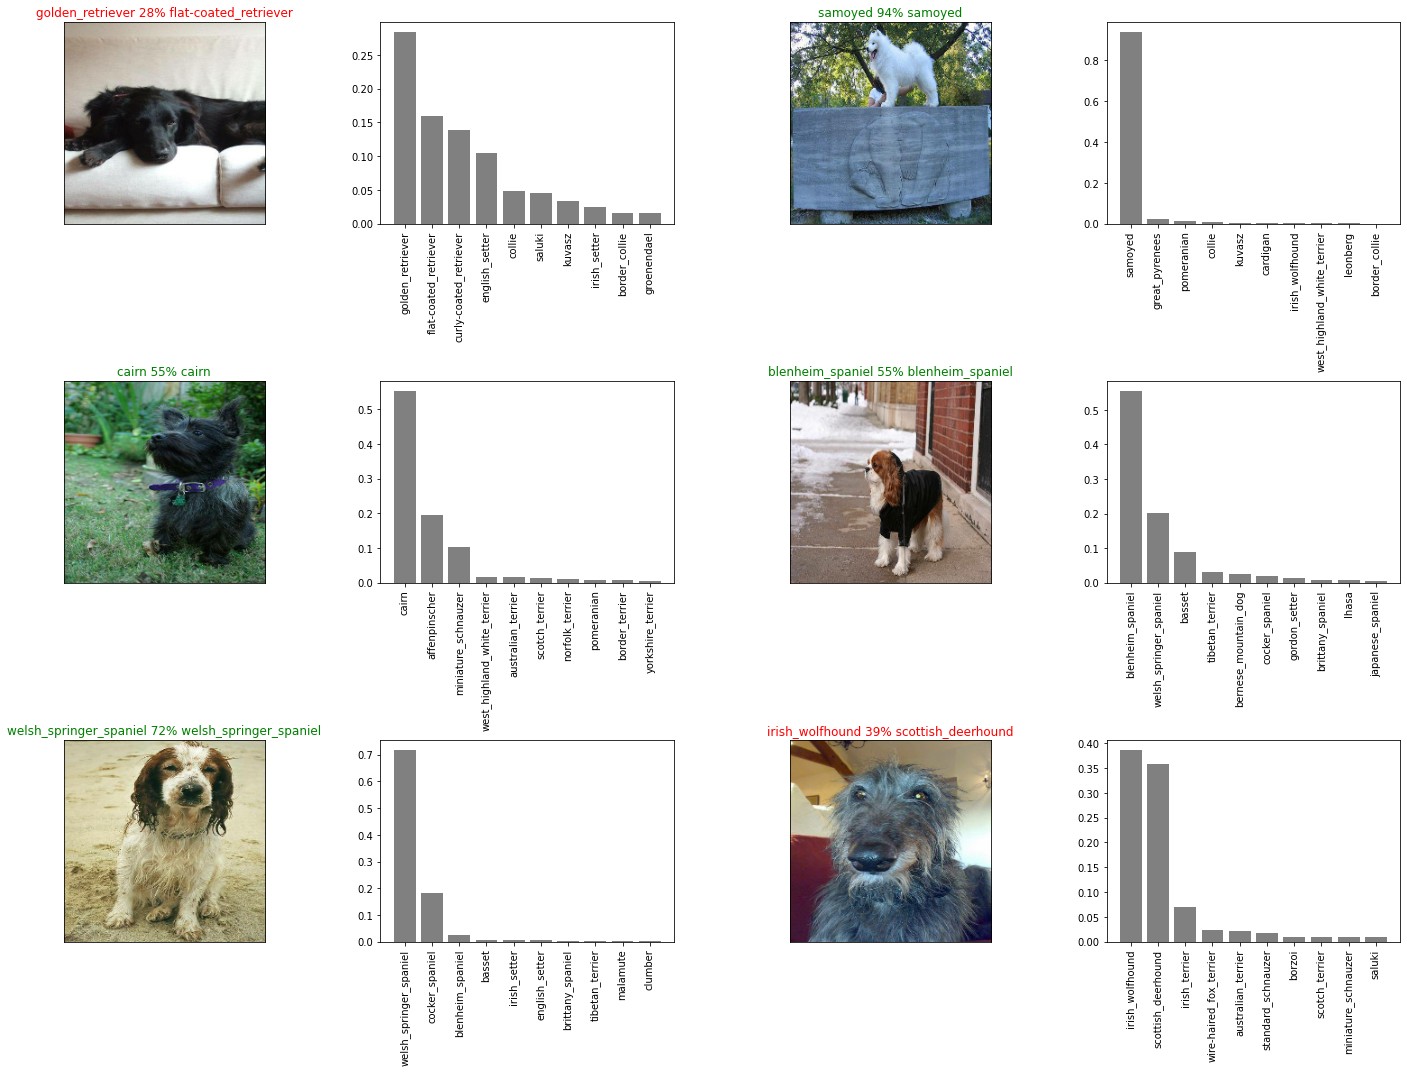

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)  
plt.show()

**Challenge** How would you create a confusion matrix with our models predictions and true labels?

## Saving and reloading a trained



In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):

 """
 Saves a given model in a models directory and appends a suffix (string) 
 """

 # Create a model directory pathname with current time
 modeldir = os.path.join("drive/My Drive/ Dog vision/models",
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
 model_path = modeldir + "-" + suffix + ".h5" # save format of model
 print(f"Saving model to: {model_path}...")
 model.save(model_path)
 return model_path



In [ ]:
# Create a function to load a trained model
def load_model(model_path):

  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from:  {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we've got function to save and load a trained model, let's make sure they work!

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/ Dog vision/models/20200506-20541588798476-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/ Dog vision/models/20200506-20541588798476-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model('drive/My Drive/ Dog vision/models/20200506-02511588733492-1000-images-mobilenetv2-Adam.h5')


Loading saved model from:  drive/My Drive/ Dog vision/models/20200506-02511588733492-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 111ms/step - loss: 1.3121 - accuracy: 0.6550


[1.3121272325515747, 0.6549999713897705]

In [ ]:
# Evalaute the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 111ms/step - loss: 1.3182 - accuracy: 0.6550


[1.3182322978973389, 0.6549999713897705]

## Training a big dog model (on the full data)

In [ ]:
len(x), len(y)

(10222, 10222)

In [ ]:
x[:10]

['drive/My Drive/ Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/ Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/ Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/ Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/ Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/ Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/ Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/ Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/ Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/ Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
len(x_train)

800

In [ ]:
y[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Create a data batch with the full data set
full_data = create_data_batches(x, y)
full_data

Creating training data batches...


<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create a model for full data 
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

**Note:** Running the cell below will take a little while (maybe up to 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [ ]:
# Fit the full model on the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 44s 137ms/step - loss: 0.0135 - accuracy: 0.9986
Epoch 2/100
320/320 [==============================] - 44s 136ms/step - loss: 0.0111 - accuracy: 0.9986
Epoch 3/100
320/320 [==============================] - 43s 135ms/step - loss: 0.0099 - accuracy: 0.9992
Epoch 4/100
320/320 [==============================] - 43s 135ms/step - loss: 0.0089 - accuracy: 0.9991
Epoch 5/100
320/320 [==============================] - 43s 136ms/step - loss: 0.0138 - accuracy: 0.9979
Epoch 6/100
320/320 [==============================] - 44s 136ms/step - loss: 0.0238 - accuracy: 0.9941


In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/ Dog vision/models/20200506-23321588807973-full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/ Dog vision/models/20200506-23321588807973-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
# Load in the full model
loaded_full_model = load_model('drive/My Drive/ Dog vision/models/20200506-23321588807973-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from:  drive/My Drive/ Dog vision/models/20200506-23321588807973-full-image-set-mobilenetv2-Adam.h5


## Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we craeted `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on test data, we'll:

* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels).
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [ ]:
# Load test image filenames
test_path = "drive/My Drive/ Dog vision/test"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]


['drive/My Drive/ Dog vision/testf3d0cbdba1dab4f22ab5510723dd969a.jpg',
 'drive/My Drive/ Dog vision/testf1b2c118e65c95ba1a00d102787d19a6.jpg',
 'drive/My Drive/ Dog vision/testeec15026b5af233fa79dfb6081e1f339.jpg',
 'drive/My Drive/ Dog vision/tested7c3126f50898ce02c08a380c1d0bbc.jpg',
 'drive/My Drive/ Dog vision/testf09c01de47c096fe62cd1398798c1369.jpg',
 'drive/My Drive/ Dog vision/testf51f6aeea8a23b6bd62728fde8f04ad8.jpg',
 'drive/My Drive/ Dog vision/teste96f1f52395b7e742fb5d83e1ac023b7.jpg',
 'drive/My Drive/ Dog vision/testea1e945b924638c2059d7718b522d48f.jpg',
 'drive/My Drive/ Dog vision/testf300694670b4219cf9e8f23306ae3407.jpg',
 'drive/My Drive/ Dog vision/testecb31808b1717c297072d6f5b8760c2f.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

**NOTE:** Calling predict on our full model and passing it the test data batch will take a long time to run (about an ~1hr). This is because we have to process ~10,000+ images and get our model to find patterns in those images and generate predictions based on what its learned in the training dataset.

In [ ]:
loaded_full_model

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 2934s 9s/step


In [ ]:
# Check out the test predictions
test_predictions[:10]

array([[1.61196489e-09, 3.44086413e-12, 2.32834394e-11, ...,
        1.06917716e-13, 1.58530451e-08, 1.52161670e-06],
       [3.17894322e-10, 3.20088262e-14, 1.85374840e-10, ...,
        7.00588814e-08, 1.88822238e-08, 2.56980937e-10],
       [4.27301083e-09, 1.84139528e-13, 1.11784948e-09, ...,
        2.71949238e-12, 2.23927123e-06, 7.41860809e-11],
       ...,
       [4.47232779e-10, 4.28004029e-07, 4.11986996e-08, ...,
        4.65437893e-07, 8.21722967e-10, 8.86002116e-09],
       [3.50528079e-11, 1.94377336e-03, 1.44941642e-10, ...,
        1.56135718e-06, 6.13228721e-08, 7.32120961e-12],
       [1.23221771e-08, 3.08354520e-09, 1.87174110e-10, ...,
        8.16165635e-10, 9.98905063e-01, 6.73740752e-09]], dtype=float32)

In [ ]:
#Save predictions (Numpy array) to csv file (for access later)
np.savetxt("drive/My Drive/ Dog vision/preds_array.csv", test_predictions, delimiter=",")


NameError: ignored

In [ ]:
# Load predictions (Numpy array) from csv file
test_predictions = np.loadtxt("drive/My Drive/ Dog vision/preds_array.csv", delimiter=",")

In [ ]:
test_predictions[:10]

In [ ]:
test_predictions.shape

## Preparing test dataset predictions for Kaggle

Looking at the Kaggle submission, we find that it wants our models prediction probability outputs in a DataFrame with an ID and a column for each different dog breed. https:/www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:
* create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extractng the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [ ]:
list(unique_breeds)

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [ ]:
["id"] + list(unique_breeds)

['id',
 'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenen

In [ ]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
# Append test image ID's to predictions DataFrame
test_path = "drive/My Drive/Data/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

id  ... yorkshire_terrier
0  dd39ff72939c0445a76f0e7db9985f56  ...               NaN
1  e0f9b92adbba451d296678f466732969  ...               NaN
2  dcd3cfe0cd6d363a3ed21639c434c8d3  ...               NaN
3  de15c21ba0a1f139d26223d5e2b09703  ...               NaN
4  def88eeacc633cbc3d46d5f5fb495379  ...               NaN

[5 rows x 121 columns]

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  dd39ff72939c0445a76f0e7db9985f56  ...       1.52162e-06
1  e0f9b92adbba451d296678f466732969  ...       2.56981e-10
2  dcd3cfe0cd6d363a3ed21639c434c8d3  ...       7.41861e-11
3  de15c21ba0a1f139d26223d5e2b09703  ...       6.13453e-11
4  def88eeacc633cbc3d46d5f5fb495379  ...       1.31887e-06

[5 rows x 121 columns]

In [ ]:
os.path.splitext(test_filenames[0])

In [ ]:
preds_df.head()

In [ ]:
# Appened test probabilities to prediction DataFrame
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [ ]:
# save our predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv("drive/My Drive/ Dog vision/full_model_predictions_submission_1_mobilenetv2.csv", 
                index=False)

## Making predictions on custom images

To make predictions on custom images, we'll:
* Get the filepaths of our own images.
* Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's `predict()` method.
* Convert the prediction output probabilities to predictions label.
* Compare the predicted labels to the custom images.





In [ ]:
# Get custom image filepaths
custom_path = "drive/My Drive/ Dog vision/my_dogs"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)
custom_preds.shape

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
# Get custom images (our unbatchfity won't work since there aren't labels.... maybe we could fix this later)

custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.appened(image)

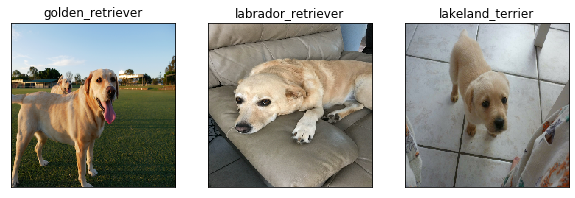

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)